# Introduction
In this notebook i'm ony trying to visualize, report and compare the happiness index and its score components on Indonesia and its surrounding neighbors that is South East Asian Country or SEA. In this notebook I did not analyze the causes of the score in detail. 

## Note
If you find this notebook helpful, please feel free to upvote and if there are any criticism or feedback please don't hesitate to comment! cheers!😃


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


# Colors

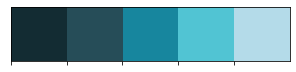

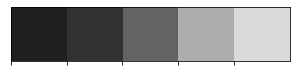

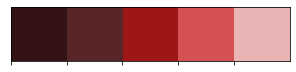

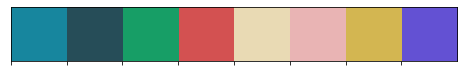

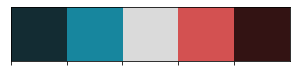

In [2]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [3]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpl.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

th = [0, 0.2, 0.5, 0.8, 1]
cdict = NonLinCdict(th, colors_blue)
cdiv = NonLinCdict(th, colors_div)

cm = LinearSegmentedColormap('blue', cdict)
cm_div = LinearSegmentedColormap('div', cdiv)

In [4]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = colors_dark[0]

In [5]:
data_2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
data_past = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
data_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [6]:
SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()

# Happiness Index

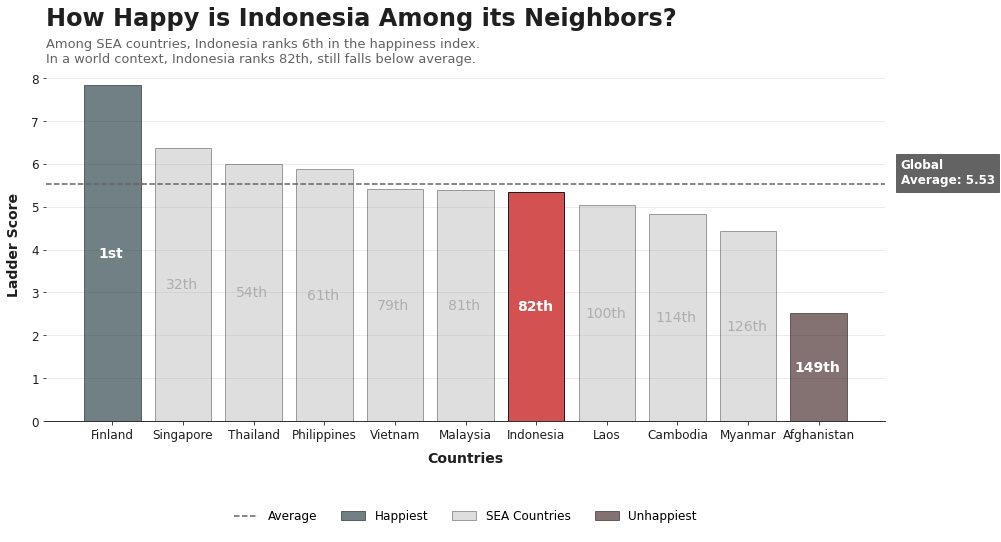

In [7]:
df = data_2021[data_2021['Country name'].isin(SEA)]
data_2021_top = data_2021.iloc[0:1]
data_2021_bot = data_2021.iloc[-1]
mean_score = data_2021['Ladder score'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Ladder score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Ladder score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Ladder score'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[5].set_alpha(1)
bars1[5].set_color(colors_red[3])
bars1[5].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 5 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="How Happy is Indonesia Among its Neighbors?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 6th in the happiness index.\nIn a world context, Indonesia ranks 82th, still falls below average.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Log GDP per Capita Ranks

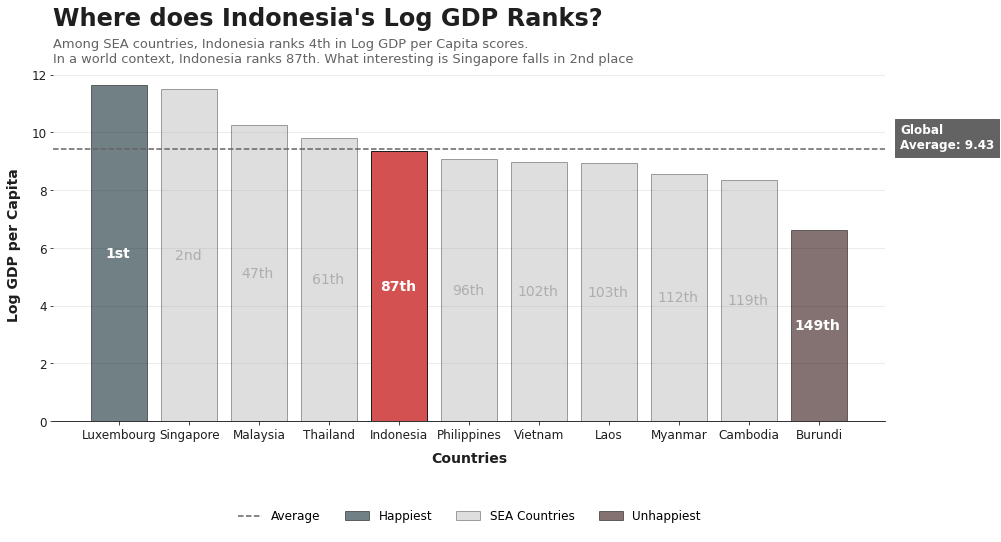

In [8]:
df_glob = data_2021.sort_values("Logged GDP per capita", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Logged GDP per capita'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Logged GDP per capita'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Logged GDP per capita'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Logged GDP per capita'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Log GDP per Capita", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[3].set_alpha(1)
bars1[3].set_color(colors_red[3])
bars1[3].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i == 0 : 
        ax.text(
            s=f"{sea_idx[i]}nd",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    elif i != 3 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Indonesia's Log GDP Ranks?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 4th in Log GDP per Capita scores.\nIn a world context, Indonesia ranks 87th. What interesting is Singapore falls in 2nd place", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Social Support Ranks

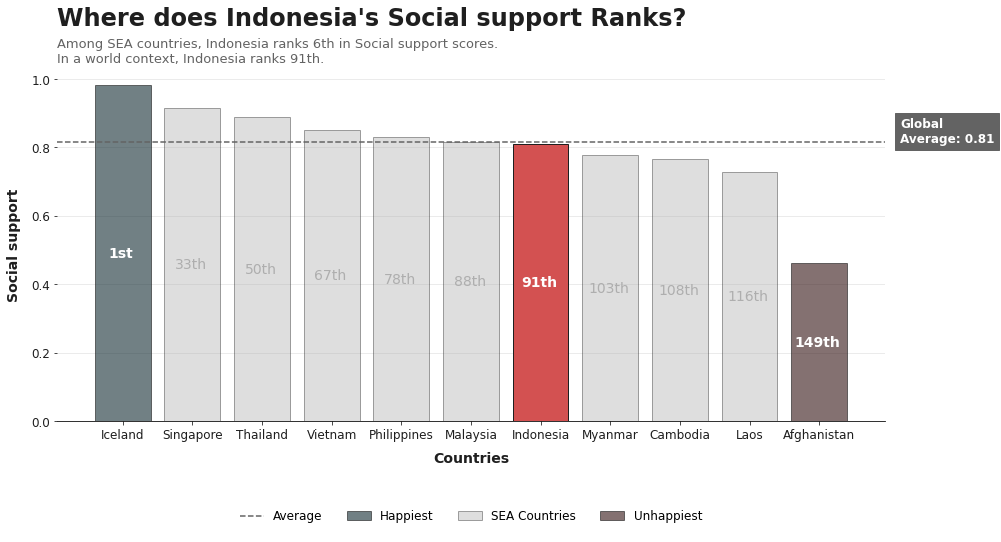

In [9]:
df_glob = data_2021.sort_values("Social support", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Social support'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Social support'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Social support'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Social support'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Social support", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[5].set_alpha(1)
bars1[5].set_color(colors_red[3])
bars1[5].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 5 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Indonesia's Social support Ranks?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 6th in Social support scores.\nIn a world context, Indonesia ranks 91th.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Healthy Life Expectancy Ranks

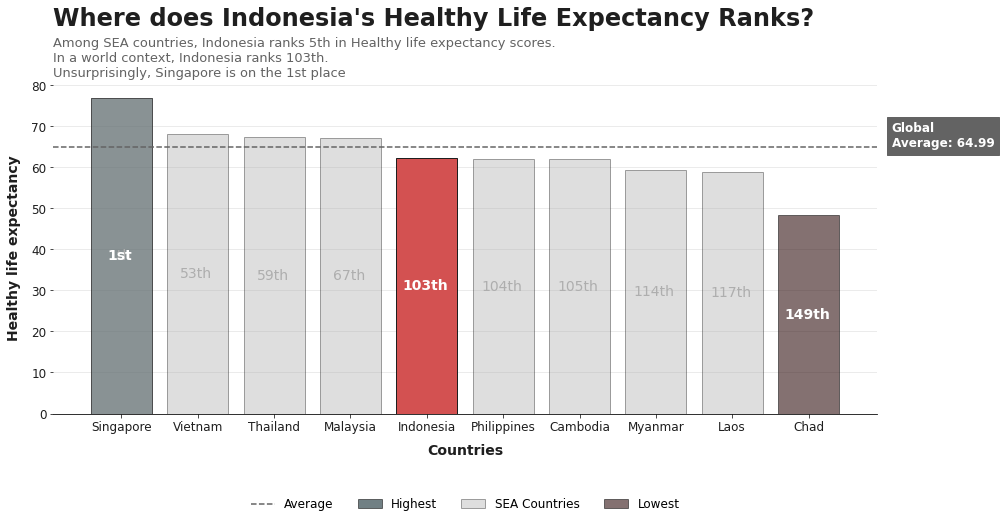

In [10]:
df_glob = data_2021.sort_values("Healthy life expectancy", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Healthy life expectancy'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Healthy life expectancy'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Healthy life expectancy'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Healthy life expectancy'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Healthy life expectancy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[4].set_alpha(1)
bars1[4].set_color(colors_red[3])
bars1[4].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 4 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Indonesia's Healthy Life Expectancy Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 5th in Healthy life expectancy scores.\nIn a world context, Indonesia ranks 103th.\nUnsurprisingly, Singapore is on the 1st place", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Freedom to Make Life Choices Ranks

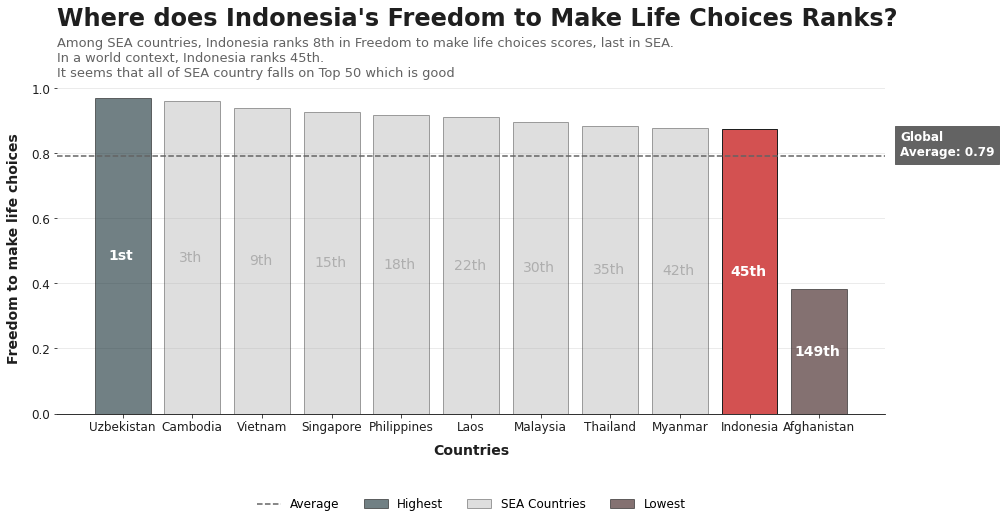

In [11]:
df_glob = data_2021.sort_values("Freedom to make life choices", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Freedom to make life choices'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Freedom to make life choices'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Freedom to make life choices'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Freedom to make life choices'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Freedom to make life choices", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[8].set_alpha(1)
bars1[8].set_color(colors_red[3])
bars1[8].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 8 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Indonesia's Freedom to Make Life Choices Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 8th in Freedom to make life choices scores, last in SEA.\nIn a world context, Indonesia ranks 45th.\nIt seems that all of SEA country falls on Top 50 which is good", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Score Components Breakdown

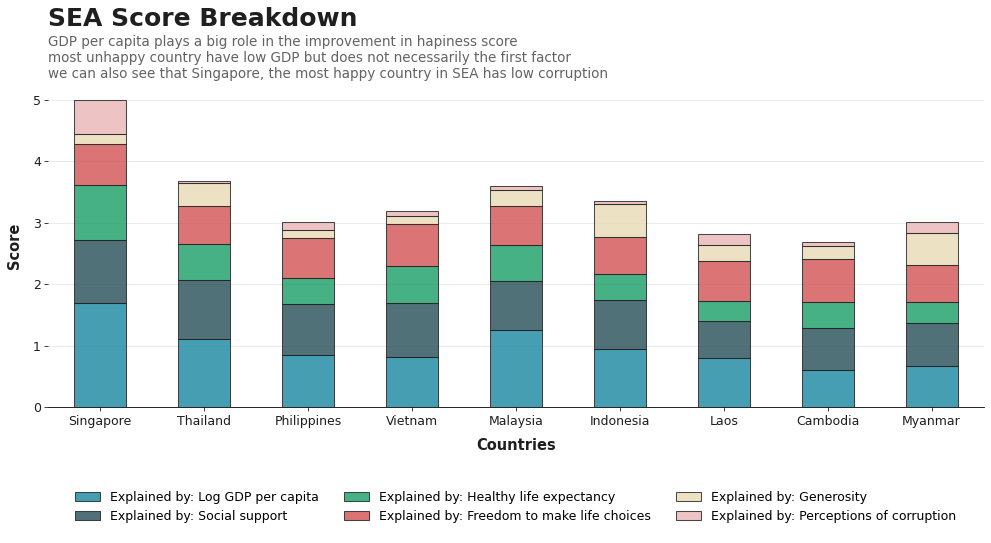

In [12]:
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_mix[0:7], alpha=0.8, edgecolor=colors_dark[0], rot=0)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="SEA Score Breakdown", ha='left', x=xmin, y=ymax*1.18, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("GDP per capita plays a big role in the improvement in hapiness score\nmost unhappy country have low GDP but does not necessarily the first factor\nwe can also see that Singapore, the most happy country in SEA has low corruption", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# Indonesia Score Components Breakdown

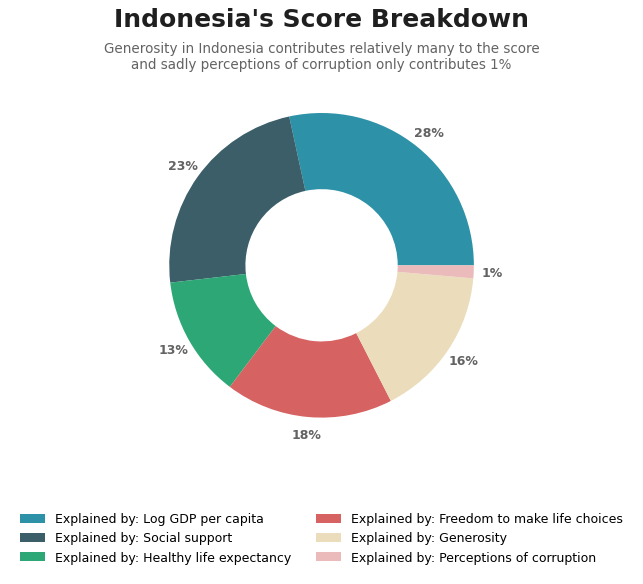

In [13]:
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")
df_idn = df.loc['Indonesia']

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

pie = ax.pie(
    df_idn, 
    colors=colors_mix[0:7],
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'color': colors_dark[2],
        'fontweight': 'bold'
    }, 
)

ax.legend(df_idn.index, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.suptitle(t="Indonesia's Score Breakdown", fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Generosity in Indonesia contributes relatively many to the score\nand sadly perceptions of corruption only contributes 1%", fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

# Indonesia Happiness Index From 2006 to 2020

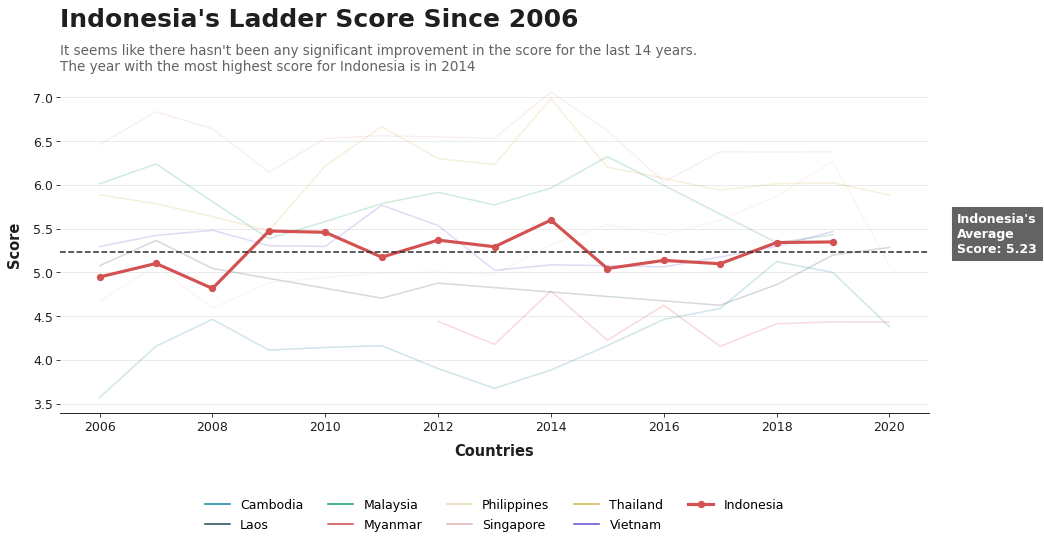

In [14]:
df = data_past[data_past['Country name'].isin(SEA)].set_index('Country name')
df_idn = df.loc['Indonesia']
df = df.reset_index()
df = df[df['Country name'] != "Indonesia"]
mean_idn = df_idn['Life Ladder'].mean()

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

line0 = sns.lineplot(data=df, x='year', y='Life Ladder', hue='Country name', alpha=0.2, ax=ax, palette=colors_mix[:9])
line1 = ax.plot(df_idn.year, df_idn['Life Ladder'], alpha=1, marker='o', color=colors_red[3], linewidth=3, label='Indonesia')
line2 = ax.axhline(mean_idn, linestyle='--', alpha=1, color=colors_dark[1])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Indonesia's\nAverage\nScore: {:.2f}".format(mean_idn),
    x=xmax+0.5,
    y=mean_idn,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="Indonesia's Ladder Score Since 2006", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("It seems like there hasn't been any significant improvement in the score for the last 14 years.\nThe year with the most highest score for Indonesia is in 2014", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

In [15]:
def getSea(row) : 
    if row['Country name'] == "Indonesia" : 
        return "Indonesia"
    elif row['Country name'] in SEA : 
        return "SEA"
    else : 
        return "Other"

# Social Well Being and Life

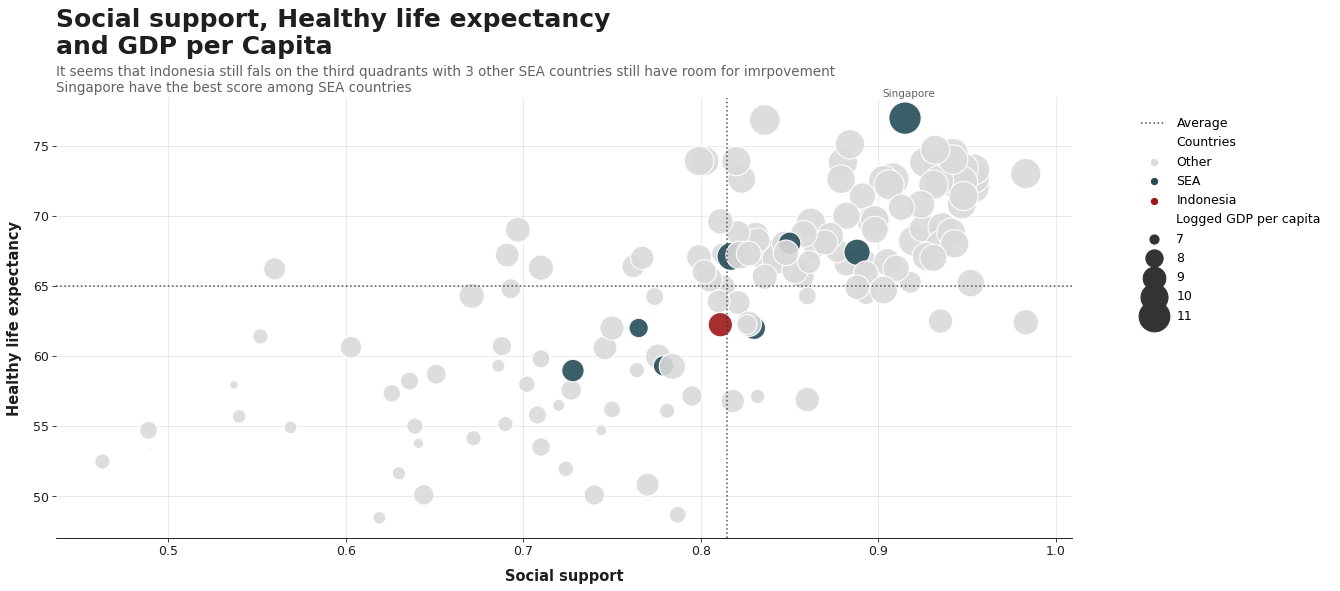

In [16]:
df = data_2021
df['Countries'] = df.apply(lambda x: getSea(x), axis=1)
meanx=df['Social support'].mean()
meany=df['Healthy life expectancy'].mean()
singx=df[df['Country name'] == 'Singapore']['Social support']
singy=df[df['Country name'] == 'Singapore']['Healthy life expectancy']

fig, ax = plt.subplots(figsize=(18, 8), dpi=75)

sns.scatterplot(
    data=df, 
    x='Social support', 
    y='Healthy life expectancy', 
    size='Logged GDP per capita', 
    ax=ax, sizes=(5, 1000),
    alpha=0.9,
    hue='Countries',
    palette=[colors_dark[4], colors_blue[1], colors_red[2]]
)
linex = ax.axvline(meanx, linestyle='dotted', color=colors_dark[1], alpha=0.8, label='Average')
liney = ax.axhline(meany, linestyle='dotted', color=colors_dark[1], alpha=0.8)
text  = ax.text(
    s="Singapore",
    x=singx-0.013,
    y=singy+1.5,
    color=colors_dark[2]
)


ax.legend(bbox_to_anchor=(1.05, 1), ncol=1, borderpad=1, frameon=False, fontsize=12)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Social support", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Healthy life expectancy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


plt.text(s="Social support, Healthy life expectancy\nand GDP per Capita", ha='left', x=xmin, y=ymax*1.04, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("It seems that Indonesia still fals on the third quadrants with 3 other SEA countries still have room for imrpovement\nSingapore have the best score among SEA countries", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()